In [1]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\govor\anaconda_projects\0d779c97-41ae-4743-8a08-902a13153742


C:\Users\govor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression): 0.9
Accuracy (Decision Tree):       0.9
Accuracy (Random Forest):       1.0

Random Forest Feature Importance (top 10):
Daily Steps                0.189452
Heart Rate                 0.187966
Systolic                   0.146626
Diastolic                  0.134272
Sleep Duration             0.123359
Quality of Sleep           0.087208
Physical Activity Level    0.067828
Stress Level               0.040324
Sleep Disorder             0.022965
dtype: float64


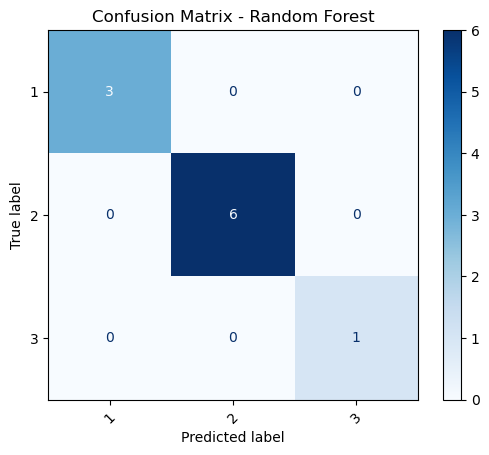


Classification report (Random Forest):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [9]:
# ===== 0) Imports =====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# ===== 1) Load data =====
path = r"C:\Users\govor\anaconda_projects\0d779c97-41ae-4743-8a08-902a13153742\Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(path)

# ===== 2) Basic cleaning =====
# Drop columns that leak or are not useful (if present)
for col in ["Person ID", "Gender", "Occupation", "Age"]:
    if col in df.columns:
        df = df.drop(columns=[col])

# Split Blood Pressure "120/80" -> two numeric columns
if "Blood Pressure" in df.columns:
    bp_split = df["Blood Pressure"].astype(str).str.split("/", expand=True)
    df["Systolic"]  = pd.to_numeric(bp_split[0], errors="coerce")
    df["Diastolic"] = pd.to_numeric(bp_split[1], errors="coerce")
    df = df.drop(columns=["Blood Pressure"])

# Drop obvious duplicates (optional)
df = df.drop_duplicates()

# ===== 3) Encode categorical columns if they are text =====
# Target
target_col = "BMI Category"
if df[target_col].dtype == "object":
    bmi_map = {
        "Underweight": 0,
        "Normal Weight": 1,
        "Normal": 1,          # just in case dataset uses "Normal"
        "Overweight": 2,
        "Obese": 3
    }
    df[target_col] = df[target_col].map(bmi_map)

# Feature: Sleep Disorder
if "Sleep Disorder" in df.columns and df["Sleep Disorder"].dtype == "object":
    sd_map = {
        "None": 0,
        "Sleep Apnea": 1,
        "Sleep Apnes": 1,     # handle typo variant
        "Insomnia": 2
    }
    df["Sleep Disorder"] = df["Sleep Disorder"].map(sd_map)

# If any rows have missing after mapping/splitting, drop them (simple choice)
df = df.dropna()

# Make sure target is int
df[target_col] = df[target_col].astype(int)

# ===== 4) Features / target and split =====
y = df[target_col]
X = df.drop(columns=[target_col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== 5) Train three models (simple settings) =====
logreg = LogisticRegression(max_iter=5000)  # more iters to avoid warnings
tree   = DecisionTreeClassifier(random_state=42)
rf     = RandomForestClassifier(n_estimators=200, random_state=42)

logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# ===== 6) Accuracy =====
print("Accuracy (Logistic Regression):", logreg.score(X_test, y_test))
print("Accuracy (Decision Tree):      ", tree.score(X_test, y_test))
print("Accuracy (Random Forest):      ", rf.score(X_test, y_test))

# ===== 7) Feature importance from Random Forest =====
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance (top 10):")
print(importances.head(10))

# ===== 8) Confusion matrix (Random Forest) + classification report =====
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("\nClassification report (Random Forest):")
print(classification_report(y_test, y_pred))


In [6]:
print(df.dtypes)

Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int64
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder               int64
dtype: object


In [5]:
print(df.head())

   Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level  \
0             6.1                 6                       42             6   
1             6.2                 6                       60             8   
2             6.2                 6                       60             8   
3             5.9                 4                       30             8   
4             5.9                 4                       30             8   

   BMI Category Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder  
0             3         126/83          77         4200               2  
1             0         125/80          75        10000               2  
2             0         125/80          75        10000               2  
3             2         140/90          85         3000               1  
4             2         140/90          85         3000               1  
